<a href="https://colab.research.google.com/github/namratabiswas/Linear-Regression/blob/main/Logistic_Regression_Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Data:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
spreadsheet_id = "1U9wuhaNTopeJP6kbanrYJv9-Mucv2OXt345sgdG5ja8"
url = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv"
bank_df = pd.read_csv(url)
bank_df.to_excel("my_sheet.xlsx")

In [6]:
bank_df= bank_df.dropna()
bank_df.shape

(4521, 17)

In [7]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


INPUT VARIABLES

Input variables
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

getting all the values of each categorical col for further data cleaning/processing

In [9]:
print(bank_df['job'].unique())
print(bank_df['marital'].unique())
print(bank_df['education'].unique())
print(bank_df['contact'].unique())
print(bank_df['month'].unique())




['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
['cellular' 'unknown' 'telephone']
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']


Data Exploration

In [10]:
bank_df['y'].value_counts()

,count
y,
no,4000
yes,521


<ipython-input-11-c7819436a652>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='y', data = bank_df,palette = "Set2")


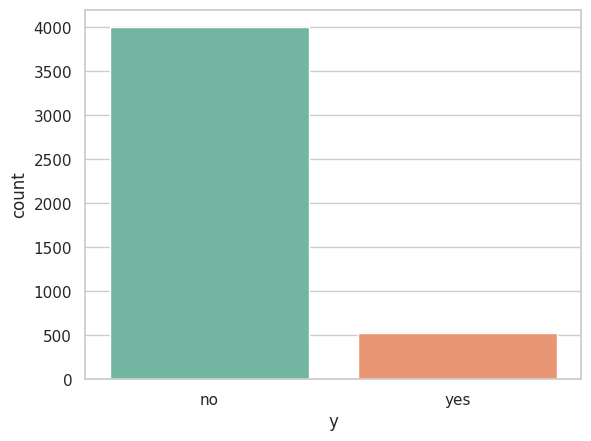

In [11]:
sns.countplot(x ='y', data = bank_df,palette = "Set2")

# Show the plot
plt.show()

So there are 4000 'No' and 500+ 'Yes' in the data for the target variable 'y'

In [12]:
bank_df.groupby('y').mean(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


Above is the average of the numeric value columns to see the relationship of the input variables with the target y.


Observations:


1) The average age of customers who bought the term deposit is higher than that of the customers who didn't. 2) The pdays (days since the customer was last contacted) is surprisingly more for the customers who bought it, as The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
3) Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

Lets visualize some categorical variables with repect to y

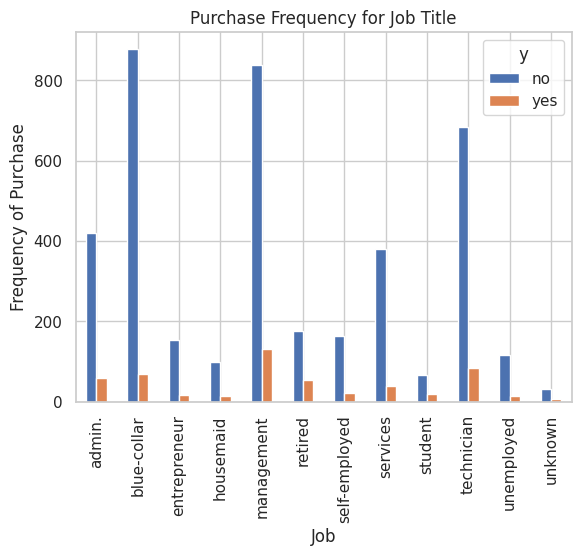

In [13]:
%matplotlib inline
pd.crosstab(bank_df.job,bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase def depends on the job title as we see here. So job title can be a good predictor

Text(0, 0.5, 'Frequency of Purchase')

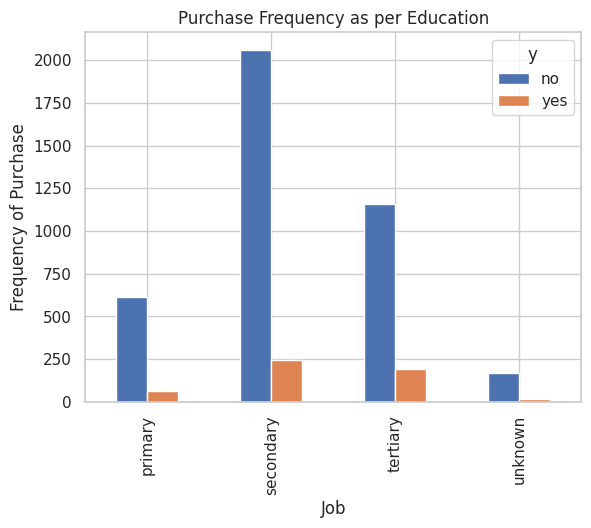

In [14]:
%matplotlib inline
pd.crosstab(bank_df.education,bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency as per Education')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')

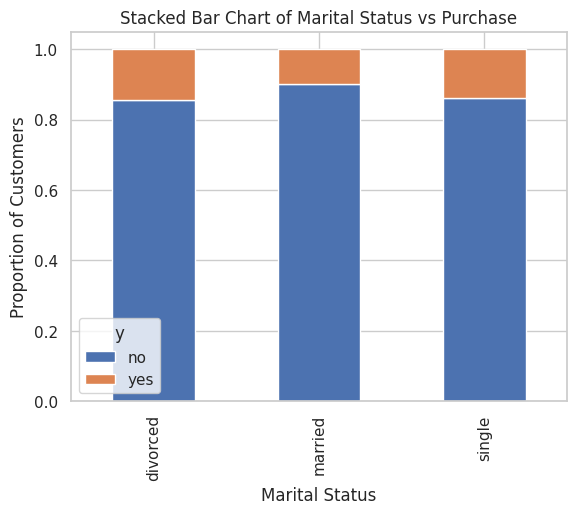

In [15]:
table=pd.crosstab(bank_df.marital,bank_df.y)
#table
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to tell from the stacked chart so mostly will avoid the marital status as a predictor.

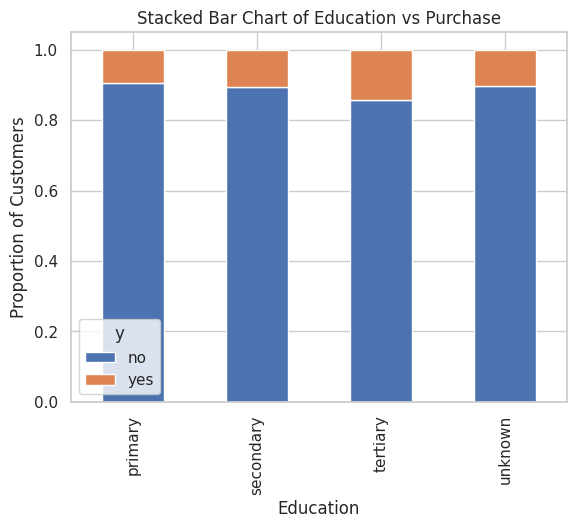

In [16]:
table=pd.crosstab(bank_df.education,bank_df.y)
#table
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('education_vs_pur_stack')

Education is a better predictor.

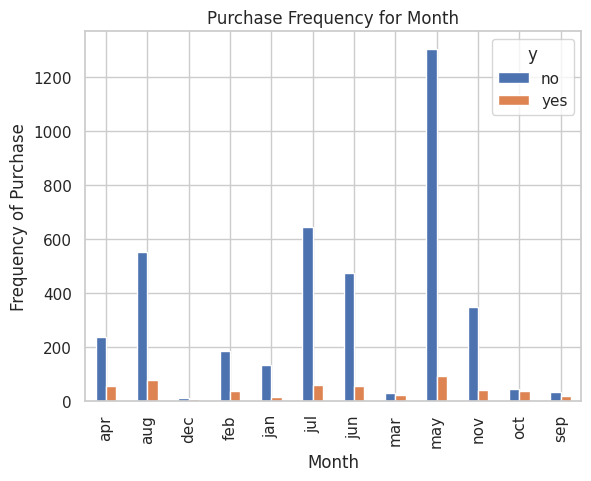

In [17]:
%matplotlib inline
pd.crosstab(bank_df.month,bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job2')

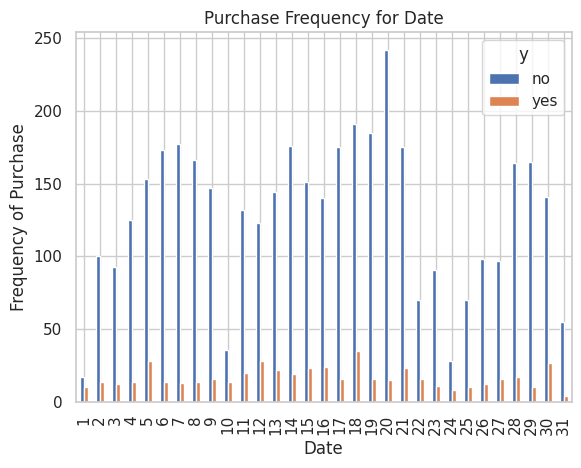

In [18]:
%matplotlib inline
pd.crosstab(bank_df.day,bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Date')
plt.xlabel('Date')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job3')

Day of the month and Month both are good predictors

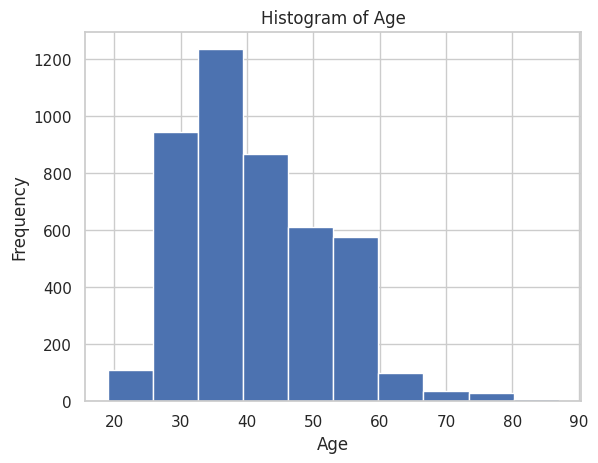

In [19]:
bank_df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most bank customers are of the age between 30-40 years

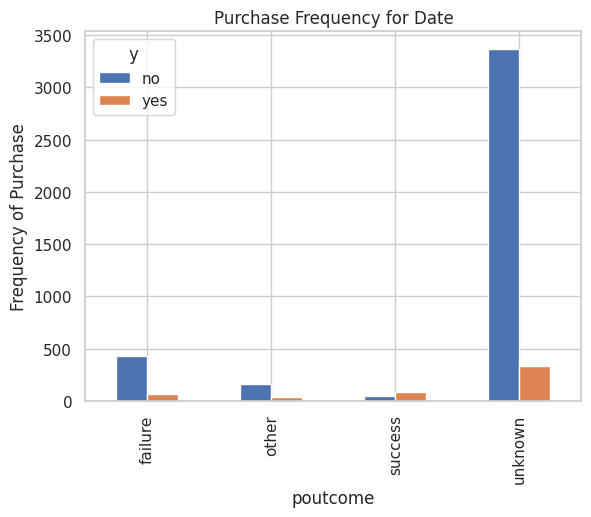

In [20]:
%matplotlib inline
pd.crosstab(bank_df.poutcome,bank_df.y).plot(kind='bar')
plt.title('Purchase Frequency for Date')
plt.xlabel('poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_poutcome')

Poutcome seems to be a good predictor of the outcome variable.

Creating Dummy Variables:

Dummy variables are commonly used in regression analysis to represent categorical variables that have more than two levels, such as education

dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [21]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_df[var], prefix=var)
    #print(cat_list)
    data1=pd.concat([bank_df, cat_list], axis=1)
    bank_df=data1
    #print(bank_df)

Just checking in the main dataframe whether all categorical features have been converted to dummy variables

In [22]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
data_vars=bank_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=bank_df[to_keep]
data_final.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19',

In [23]:
data_final_vars=data_final.columns.values.tolist()
labl_name = ['y']
feature_name = [i for i in data_final_vars if i not in labl_name]

Feature Selection

In [24]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=30)

rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(data_final[feature_name], data_final[labl_name] )
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False False False  True False False  True False False False
 False False False False  True False False False False False False False
 False False False False False  True False False False False False False
 False False  True False False False False  True  True]
[47 67 48 41 65 44 32 19 45 56 58  1 46 31 57 21 20 70 25 11 39 30 29 28
 54 16 60 38 26 40  1 23 24  1 37 13 18 15  6  8 36  1  7 12  1 34 69 63
 52  4 43  9  1 10 27 72 61 17 62 14 64 51  5 66  3  1 35 42 49 71 55 53
 50 22  1 33 59  2 68  1  1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(rfe.ranking_)

[47 67 48 41 65 44 32 19 45 56 58  1 46 31 57 21 20 70 25 11 39 30 29 28
 54 16 60 38 26 40  1 23 24  1 37 13 18 15  6  8 36  1  7 12  1 34 69 63
 52  4 43  9  1 10 27 72 61 17 62 14 64 51  5 66  3  1 35 42 49 71 55 53
 50 22  1 33 59  2 68  1  1]


Below are the features that were selected

In [26]:
print(rfe.get_feature_names_out())

['job_retired' 'loan_yes' 'contact_unknown' 'month_mar' 'month_oct'
 'day_7' 'day_20' 'day_29' 'poutcome_success' 'poutcome_unknown']


In [27]:
cols=["job_retired","loan_yes", "contact_unknown", "month_mar" ,"month_oct",
 "day_7", "day_20", "day_29", "poutcome_success", "poutcome_unknown"]
X=data_final[cols]
y=data_final['y']

Logistic Regression Model Fitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test results and caculating the accuracy

In [29]:
y_pred = logreg.predict(X_test)

In [30]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1180   10]
 [ 145   22]]


The above result tells us that there are 1180+22 correct predictions and 145+10 wrong predictions in our dataset.

Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      1190
         yes       0.69      0.13      0.22       167

    accuracy                           0.89      1357
   macro avg       0.79      0.56      0.58      1357
weighted avg       0.87      0.89      0.85      1357



I would try different no of feature selection and check whether it has any effects on the accuracy score.
I will try with multiples of 2 starting with no of features to select = 2 through 20 and append the score in a list.

In [78]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=30)

rfe = RFE(logreg, n_features_to_select=6)


In [79]:
rfe = rfe.fit(data_final[feature_name], data_final[labl_name] )
print(rfe.support_)
print(rfe.ranking_)
print(rfe.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True False]
[51 71 52 45 69 48 36 23 49 60 62  1 50 35 61 25 24 74 29 15 43 34 33 32
 58 20 64 42 30 44  4 27 28  1 41 17 22 19 10 12 40  1 11 16  1 38 73 67
 56  8 47 13  2 14 31 76 65 21 66 18 68 55  9 70  7  3 39 46 53 75 59 57
 54 26  1 37 63  6 72  1  5]
['job_retired' 'contact_unknown' 'month_mar' 'month_oct' 'day_29'
 'poutcome_success']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [80]:


cols=['job_retired', 'contact_unknown', 'month_mar' ,'month_oct' ,'day_29',
 'poutcome_success']
X=data_final[cols]
y=data_final['y']

#Model Fitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)

#score_list.append(score)
print('Accuracy of logistic regression classifier on test set:', score)
#print(score_list)

Accuracy of logistic regression classifier on test set: 0.8872512896094326


In [64]:
score_list = [0.88725, 0.88725, ]


WORKING ON THE ROC CURVE

ROC Curve

In [ ]:
#data_final.columns

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()